# Supervised Learning

## T0.
(a) Import Data


In [1]:
import math
import pandas as pd
import numpy as np
from scipy.linalg import inv, det

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('ds02.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'ds02.csv'

(b) Normalize the dataset

In [3]:
#Case A
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
dfA = pd.DataFrame(scaler.transform(df),columns=df.columns)
dfA['class'] = df['class']
dfA

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,class
0,0.750000,0.909091,0.909091,0.754406,0.0,0.180454,0.038895,0.000000,0.426702,0.788253,0.308897,0.473752,0
1,0.405325,0.868118,0.090909,0.767624,0.0,0.015006,0.003507,0.010398,0.074739,0.353054,0.301572,0.460980,0
2,0.263314,0.790013,0.818182,0.797780,1.0,0.172759,0.004995,0.000000,0.347971,0.587146,0.161959,0.294174,0
3,0.344675,0.842510,0.636364,0.929389,0.0,0.096960,0.108395,0.000408,0.299179,0.133858,0.581308,0.418959,0
4,0.389053,0.422535,0.272727,0.596132,0.0,0.003848,0.454835,0.000000,0.088490,0.344541,0.727016,0.420136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.835799,0.522407,0.818182,0.739071,0.0,0.110042,0.157279,0.000000,0.067975,0.673335,0.216249,0.260181,1
500,0.815089,0.227913,0.181818,0.651923,1.0,0.114082,0.192349,0.000000,0.123974,0.490317,0.463654,0.151561,1
501,0.535503,0.533931,0.909091,0.838178,1.0,0.001347,0.162593,0.000000,0.095143,0.420089,0.154410,0.169068,1
502,0.315089,0.162612,0.363636,0.588636,1.0,0.035783,0.612115,0.000000,0.204923,0.060013,0.247243,0.265116,1


In [4]:
#Case B
pca = PCA(n_components = 2)
dfB = pca.fit(df).transform(df)
columns = ['Feature1','Feature2']
dfB = pd.DataFrame(dfB, columns=columns)
scaler.fit(dfB)
dfB = pd.DataFrame(scaler.transform(dfB),columns=dfB.columns)
dfB['class'] = df['class']
dfB

,Feature1,Feature2,class
0,0.473752,0.280826,0
1,0.460980,0.275383,0
2,0.294174,0.151162,0
3,0.418959,0.572706,0
4,0.420136,0.724075,0
...,...,...,...
499,0.260181,0.212136,1
500,0.151561,0.484624,1
501,0.169068,0.159679,1
502,0.265116,0.243764,1


## T1. (Only for case B)

In [151]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfW0['Feature1'].mean() , dfW0['Feature2'].mean()])
meanW1 = np.array([dfW1['Feature1'].mean() , dfW1['Feature2'].mean()])

# Calcular la media y la matriz de covarianza para cada clase
covMatrixW0 = np.cov(dfW0, rowvar=False)
covMatrixW1 = np.cov(dfW1, rowvar=False)


#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c0 = - 0.5 * np.log(det(covMatrixW0)) - np.log(2*math.pi)
c1 = - 0.5 * np.log(det(covMatrixW1)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrixW0) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
    g1 = -0.5 * X[i].T @ inv(covMatrixW1) @ X[i] + 0.5 * X[i].T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Precisión (Accuracy):', (accuracy*100).round(2),'%')

Precisión (Accuracy): 67.76 %


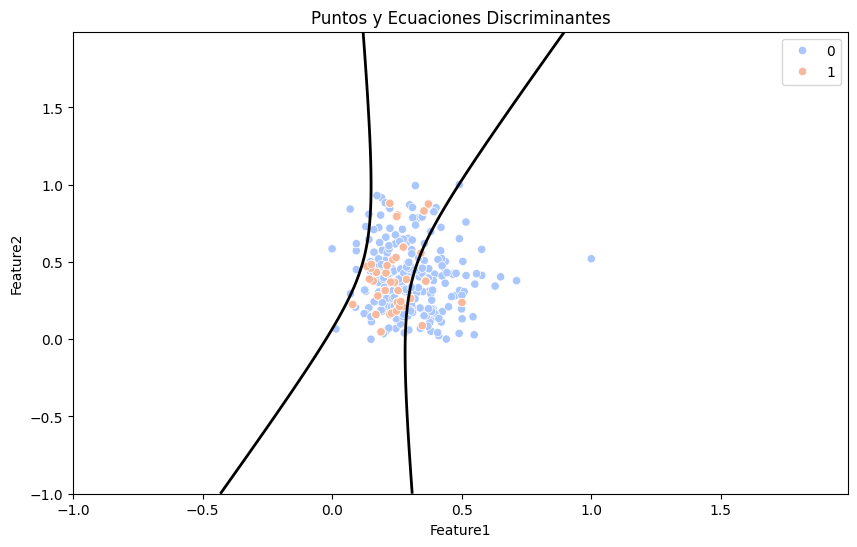

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv, det
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Supongamos que ya has realizado la división y el cálculo de las medias y covarianzas

# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrixW0) @ point + 0.5 * point.T @ inv(covMatrixW0) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ point - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrixW1) @ point + 0.5 * point.T @ inv(covMatrixW1) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ point - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuaciones Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()


## T2. (Only for case B)

In [150]:
# Dividir los datos en conjuntos de entrenamiento y prueba
dfB_Train, dfB_Test = train_test_split(dfB, test_size=0.3, random_state=100)

# Separamos las clases 
dfW0 = dfB_Train[dfB_Train['class'] == 0].drop('class', axis=1)
dfW1 = dfB_Train[dfB_Train['class'] == 1].drop('class', axis=1)

# Calculamos la media de cada caracteristica de cada clase
meanW0 = np.array([dfW0['Feature1'].mean() , dfW0['Feature2'].mean()])
meanW1 = np.array([dfW1['Feature1'].mean() , dfW1['Feature2'].mean()])

#Calculamos una sola matriz para todas las clases
covMatrix = np.cov(dfB_Train.drop('class', axis=1), rowvar=False)

#CREAMOS LA FUNCION DISCRIMINANTE
prior = 0.5  # Clases equiprobables
c = - 0.5 * np.log(det(covMatrix)) - np.log(2*math.pi)

# Calculamos las predicciones de cada una de las variables de Test

X = np.array(dfB_Test[['Feature1', 'Feature2']])
y = np.array(dfB_Test['class'])
predictions = []

for i in range(len(X)):
    g0 = -0.5 * X[i].T @ inv(covMatrix) @ X[i] + 0.5 * X[i].T @ inv(covMatrix) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrixW0) @ X[i] - 0.5 * meanW0.T @ inv(covMatrixW0) @ meanW0 + np.log(prior) + c
    g1 = -0.5 * X[i].T @ inv(covMatrix) @ X[i] + 0.5 * X[i].T @ inv(covMatrix) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrixW1) @ X[i] - 0.5 * meanW1.T @ inv(covMatrixW1) @ meanW1 + np.log(prior) + c

    if g0 > g1:
        predictions.append(0)
    else:
        predictions.append(1)


#Calculamos la precision del modelo
accuracy = accuracy_score(y, predictions)
print('Precisión (Accuracy):', (accuracy*100).round(2),'%')




Precisión (Accuracy): 43.42 %


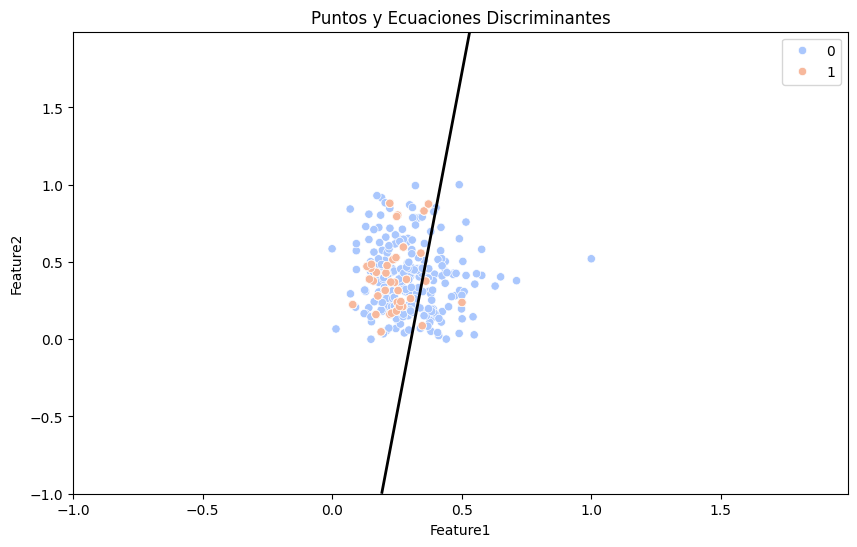

In [153]:
# Crea una malla de puntos para la visualización
x_min, x_max = dfB['Feature1'].min() - 1, dfB['Feature1'].max() + 1
y_min, y_max = dfB['Feature2'].min() - 1, dfB['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula las funciones discriminantes para cada punto en la malla
Z0 = np.zeros_like(xx)
Z1 = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        g0 = -0.5 * point.T @ inv(covMatrix) @ point + 0.5 * point.T @ inv(covMatrix) @ meanW0 + 0.5 * meanW0.T @ inv(covMatrix) @ point - 0.5 * meanW0.T @ inv(covMatrix) @ meanW0 + np.log(prior) + c0
        g1 = -0.5 * point.T @ inv(covMatrix) @ point + 0.5 * point.T @ inv(covMatrix) @ meanW1 + 0.5 * meanW1.T @ inv(covMatrix) @ point - 0.5 * meanW1.T @ inv(covMatrix) @ meanW1 + np.log(prior) + c1
        Z0[i, j] = g0
        Z1[i, j] = g1

# Grafica los puntos y las regiones de decisión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='class', data=dfB, palette='coolwarm', legend='full')
plt.contour(xx, yy, Z0-Z1, levels=[0], linewidths=2, colors='black')  # Línea de decisión

plt.title('Puntos y Ecuaciones Discriminantes')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right')
plt.show()